In [1]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [2]:
world['area'] = world.geometry.apply(lambda x: x.area)
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.639511
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",76.301964
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",8.603984
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1712.995228
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1122.281921


<AxesSubplot:>

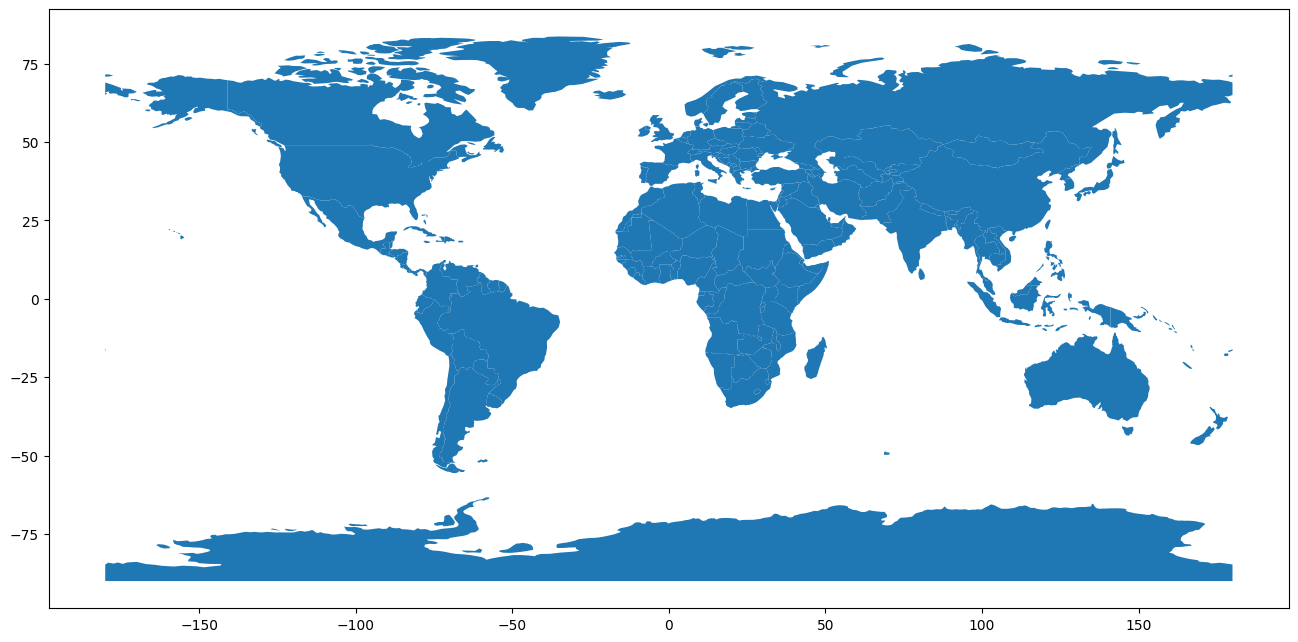

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
world.plot()


<AxesSubplot:>

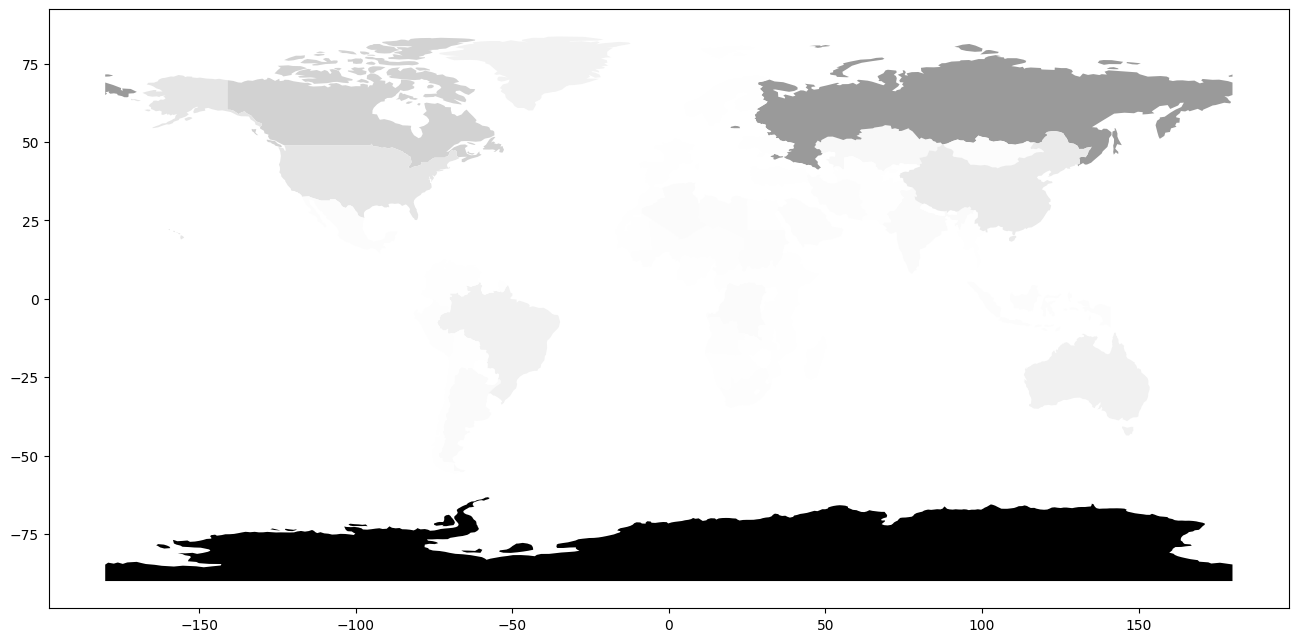

In [4]:
world.plot(column='area', cmap='Greys')

Text(0.5, 1.0, 'Area per country')

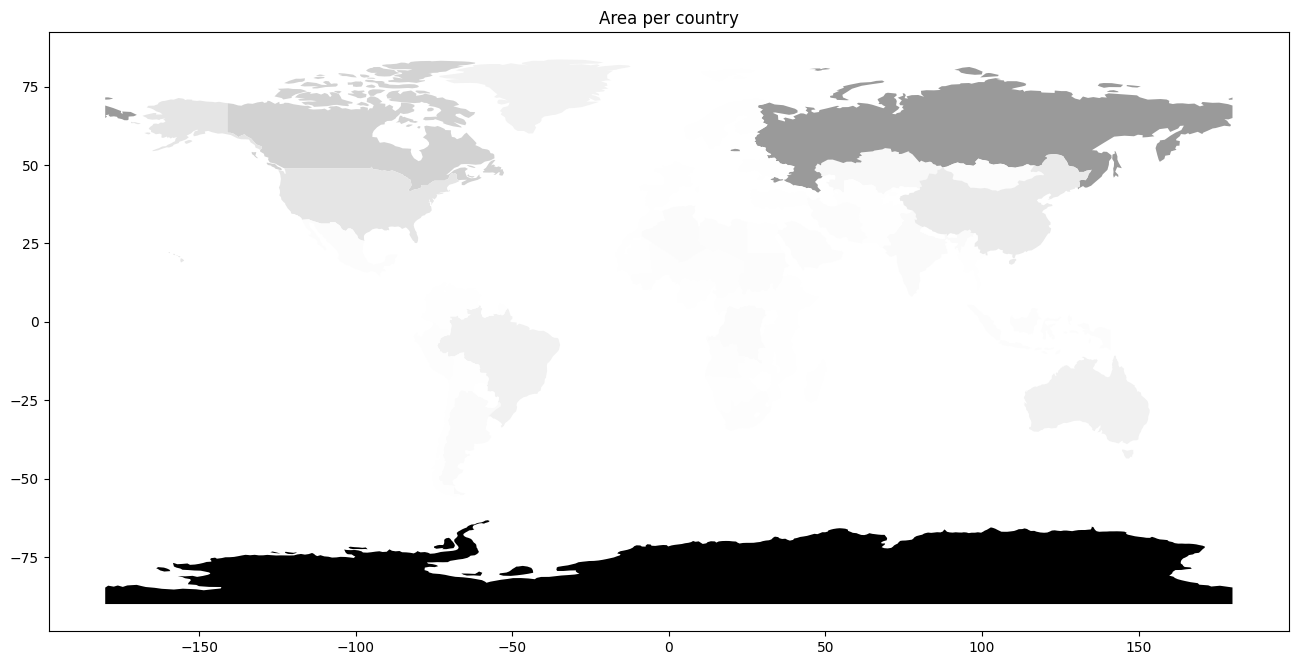

In [5]:
world.plot(column='area', cmap='Greys')
plt.title('Area per country')


Text(0.5, 1.0, 'Area per country')

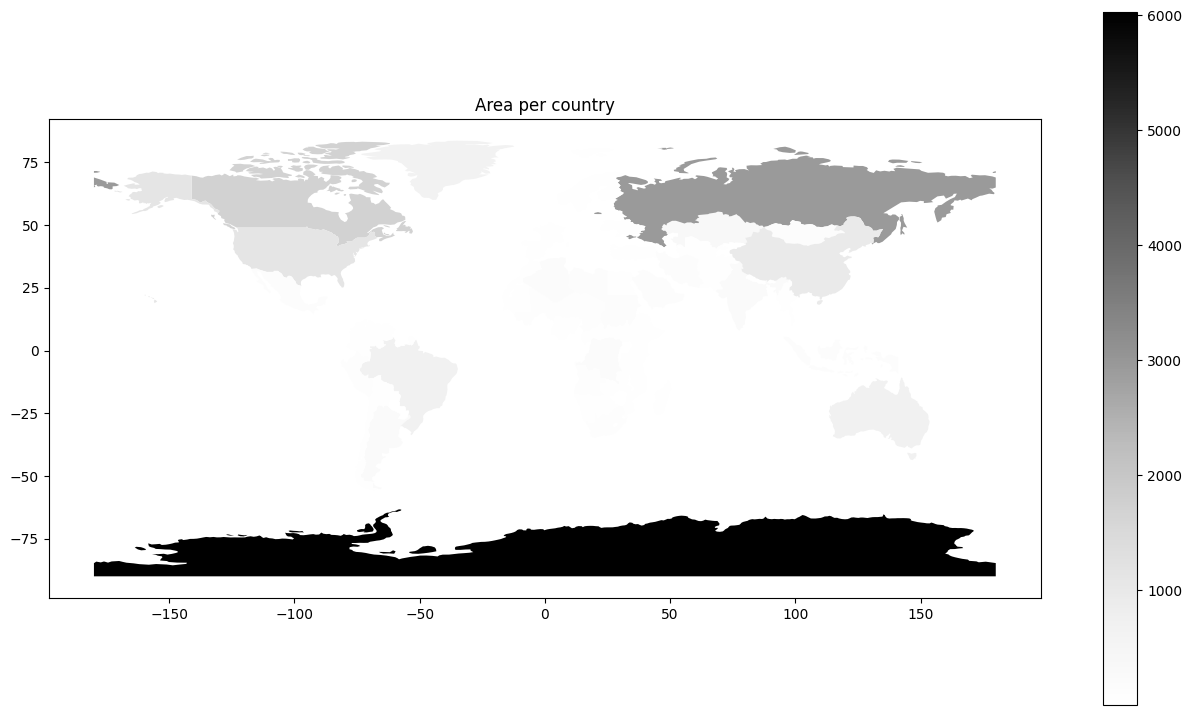

In [6]:
import matplotlib.pyplot as plt
world.plot(column='area', cmap='Greys', legend=True)
plt.title('Area per country')


In [7]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


<AxesSubplot:>

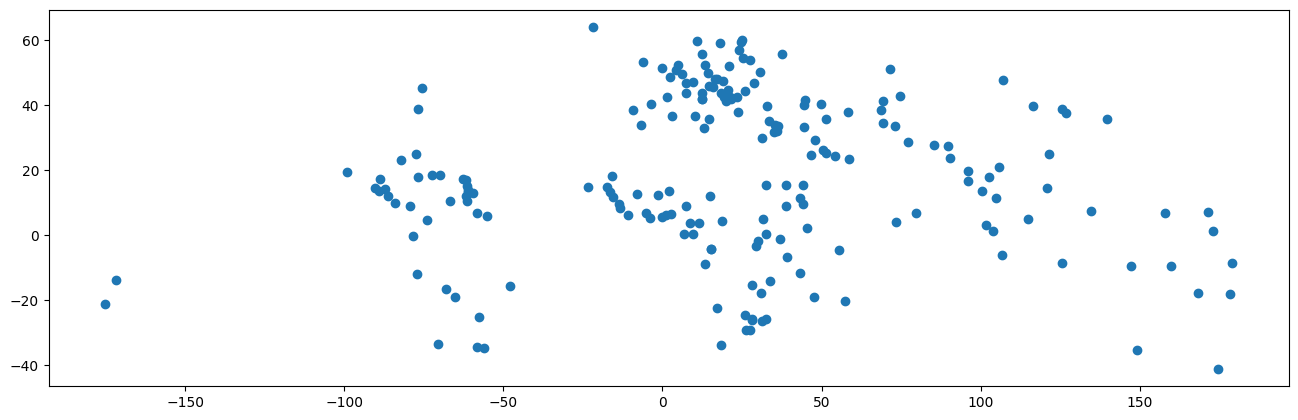

In [8]:
cities.plot()

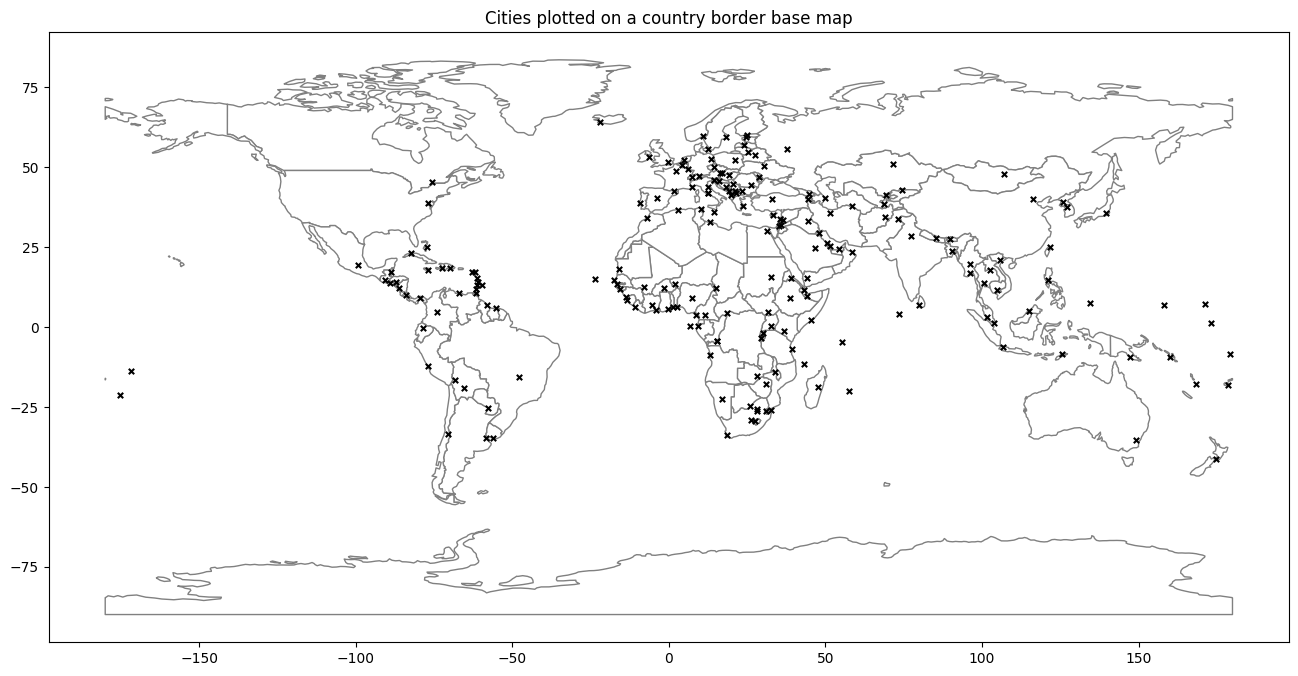

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]

fig, ax = plt.subplots()
ax.set_aspect('equal')
world.plot(ax=ax, color='white', edgecolor='grey')
cities.plot(ax=ax, marker='x', color='black', markersize=15)
plt.title('Cities plotted on a country border base map')
plt.show()



c:\Users\Administrator\PycharmProjects\env_py310\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\Administrator\PycharmProjects\env_py310\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\Administrator\PycharmProjects\env_py310\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


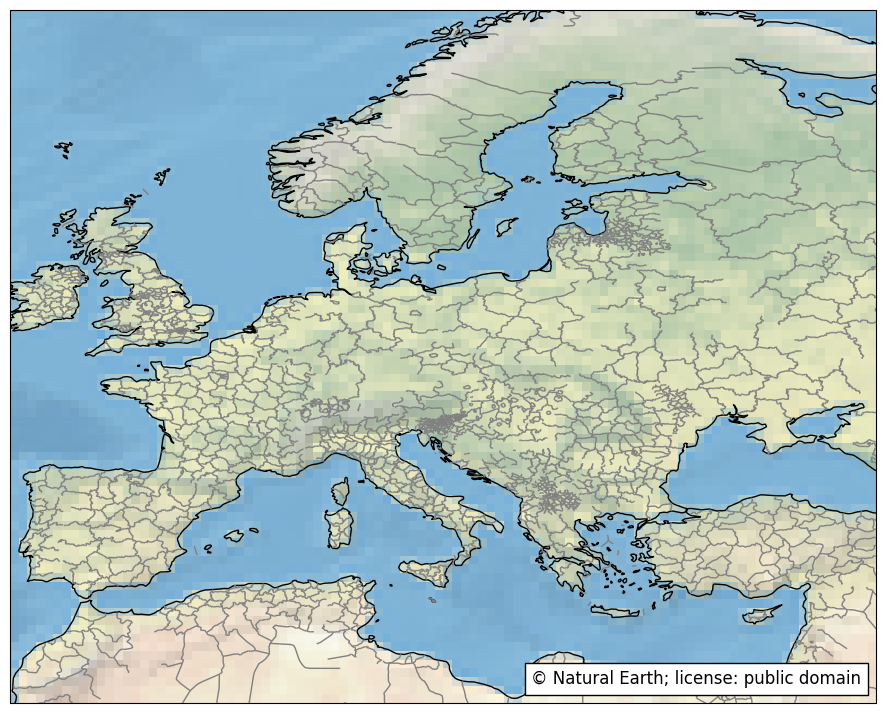

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

plt.rcParams["figure.figsize"] = [16,9]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-10, 40, 30, 70], crs=ccrs.PlateCarree())

# background image
ax.stock_img()

# use an inbuit feature from cartopy
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray')

# Add a copyright
text = AnchoredText('\u00A9 Natural Earth; license: public domain',loc=4, prop={'size': 12}, frameon=True)

ax.add_artist(text)

plt.show()



In [1]:
import plotly.express as px
data = px.data.gapminder().query("year==2002")
data.head()


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
10,Afghanistan,Asia,2002,42.129,25268405,726.734055,AFG,4
22,Albania,Europe,2002,75.651,3508512,4604.211737,ALB,8
34,Algeria,Africa,2002,70.994,31287142,5288.040382,DZA,12
46,Angola,Africa,2002,41.003,10866106,2773.287312,AGO,24
58,Argentina,Americas,2002,74.340,38331121,8797.640716,ARG,32


In [2]:
data['gdp'] = data['gdpPercap'] * data['pop']
data.head()


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,gdp
10,Afghanistan,Asia,2002,42.129,25268405,726.734055,AFG,4,1.836341e+10
22,Albania,Europe,2002,75.651,3508512,4604.211737,ALB,8,1.615393e+10
34,Algeria,Africa,2002,70.994,31287142,5288.040382,DZA,12,1.654477e+11
46,Angola,Africa,2002,41.003,10866106,2773.287312,AGO,24,3.013483e+10
58,Argentina,Americas,2002,74.340,38331121,8797.640716,ARG,32,3.372234e+11


In [3]:
fig = px.scatter_geo(data, locations="iso_alpha", size="gdp", projection="natural earth")
fig.show()


In [5]:
import folium
m = folium.Map(location=[48.8545, 2.2464])
m


In [6]:
import folium
m = folium.Map(location=[48.8545, 2.2464], zoom_start=11)

folium.Marker(
    [48.8584, 2.2945], popup="Eiffel Tower").add_to(m)
folium.Marker(
    [48.8738, 2.2950], popup="Arc de Triomphe").add_to(m)

m
